In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

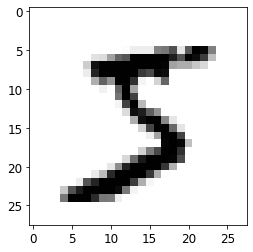

In [4]:
some_digit = X[0].reshape(28, 28)
plt.imshow(some_digit, cmap='binary') # mpl.cm.binary

In [5]:
y = y.astype(np.uint8)
y[0]

5

In [6]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap='binary', interpolation='nearest')
    plt.axis('off') # disable axis existance

In [7]:
def plot_digits(instances, images_per_row=10, **options):
    size=28
    images_per_row = min(len(instances), images_per_row)
    n_rows = len(instances) // images_per_row + (len(instances)%images_per_row != 0)
    
    # Append empty images to fill end of grid if needed
    n_empty = n_rows * images_per_row - len(instances)
    padded = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)
    
    # reshape array so that it is now a 28x28 grid
    image_grid = padded.reshape((n_rows, images_per_row, size, size))
    
    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # now we draw
    plt.imshow(big_image, cmap='binary', **options)
    plt.show()

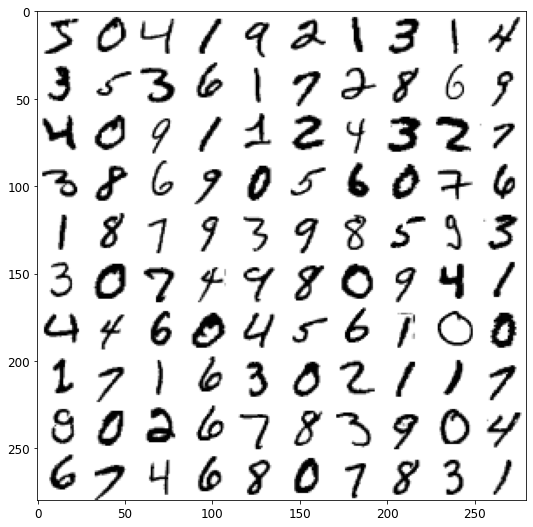

In [8]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
plt.show()

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Training a binary Classifier

In [10]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [11]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [12]:
sgd.predict([some_digit.reshape(784)]) # true

array([ True])

In [13]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [14]:
sgd.predict([X_train[0]])  # false

array([ True])

# Performance Measures

### Measuring Accuracy using cross-validation

In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

strkf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_indices, test_indices in strkf.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_indices]
    y_train_folds = y_train_5[train_indices]
    X_test_folds = X_train[test_indices]
    y_test_folds = y_train_5[test_indices]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    # getting accuracy
    y_pred = clone_clf.predict(X_test_folds)
    acc = np.sum(y_pred == y_test_folds) / len(y_pred)
    print(round(acc, 3))

0.967
0.916
0.968


In [16]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [17]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [18]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [19]:
# for a perfect score
y_train_perfect = y_train_5
confusion_matrix(y_train_5, y_train_perfect)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

## Precision and Recall

In [20]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

## Multiclass Classification

In [21]:
from sklearn.svm import SVC

svc = SVC(gamma='auto', random_state=42)
svc.fit(X_train[:1000], y_train[:1000])
some_digit = some_digit.reshape(28*28)
svc.predict([some_digit])

array([5], dtype=uint8)

In [22]:
some_digit_scores = svc.decision_function([some_digit])
some_digit_scores

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

In [23]:
np.argmax(some_digit_scores)

5

In [24]:
svc.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## MultiOuput Classification

In [25]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

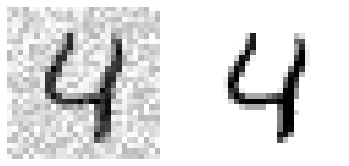

In [26]:
some_index=4
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()
knc.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

In [28]:
clean_digit = knc.predict([X_test_mod[0]])

In [29]:
clean_digit.shape

(1, 784)

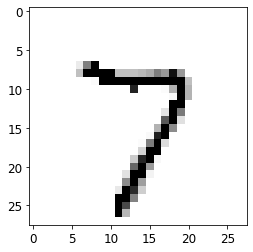

In [30]:
plot_digits(clean_digit[:20])

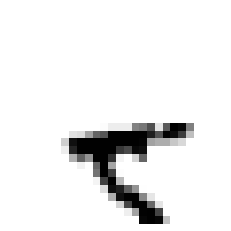

In [31]:
from scipy.ndimage.interpolation import shift

dx, dy = 0, 10

shifted_left = shift(some_digit.reshape(28, 28), [dy, dx], cval=0)
plot_digit(shifted_left)